# Dimensionality Reduction

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cufflinks as cf

In [46]:
cf.go_offline()

In [2]:
IBM = pd.read_csv("datasets/IBM.csv")

In [9]:
for i, var in enumerate(IBM.columns):
    print(i+1, var)

1 Age
2 Attrition
3 BusinessTravel
4 DailyRate
5 Department
6 DistanceFromHome
7 Education
8 EducationField
9 EmployeeCount
10 EmployeeNumber
11 EnvironmentSatisfaction
12 Gender
13 HourlyRate
14 JobInvolvement
15 JobLevel
16 JobRole
17 JobSatisfaction
18 MaritalStatus
19 MonthlyIncome
20 MonthlyRate
21 NumCompaniesWorked
22 Over18
23 OverTime
24 PercentSalaryHike
25 PerformanceRating
26 RelationshipSatisfaction
27 StandardHours
28 StockOptionLevel
29 TotalWorkingYears
30 TrainingTimesLastYear
31 WorkLifeBalance
32 YearsAtCompany
33 YearsInCurrentRole
34 YearsSinceLastPromotion
35 YearsWithCurrManager


# Principal Component Analysis (PCA)

In [10]:
features = IBM.drop('Attrition', axis='columns')

### 1. Make sure all variables ae numeric by creating dummy variables

In [13]:
features_dummies = pd.get_dummies(features, drop_first=True)

### 2. Scale the variables 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(features_dummies)

StandardScaler()

In [20]:
features_scaled = pd.DataFrame(scaler.transform(features_dummies))

### 3. Create Principal components and determine how many eigenvectors to use for prediction

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=None)

In [23]:
pca.fit(features_scaled)

PCA()

In [30]:
eigenvectors = pd.DataFrame(pca.explained_variance_ratio_, columns=['eigenvalue'])

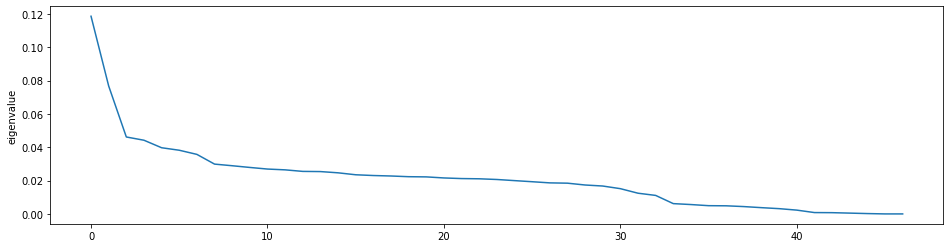

In [38]:
plt.figure(figsize=(16, 4))
sns.lineplot(data=eigenvectors, x=eigenvectors.index, y='eigenvalue')
plt.show()

### 4. Create Principal components (eigenvectors) for analysis

In [55]:
pca = PCA(n_components=7)
pca.fit(features_scaled)
features_pc = pca.transform(features_scaled)

In [56]:
#features_pc = pd.DataFrame(features_pc, columns=['x','y', 'z'])
#features_pc = pd.concat([features_pc, IBM.Attrition], axis='columns')

In [57]:
#features_pc.iplot(x='x', y='y', z='z', kind='scatter3d', categories='Attrition')

In [60]:
features_pc = pd.DataFrame(features_pc)

### 5. create our test train split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
feat_train, feat_test, lab_train, lab_test = train_test_split(features_pc, IBM.Attrition, test_size=0.2, random_state=101)

# Test with multiple Algorithms

In [64]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(feat_train, lab_train)
kpred = knn.predict(feat_test)

In [65]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(feat_train, lab_train)
spred = svc.predict(feat_test)

In [66]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(feat_train, lab_train)
dpred = dtc.predict(feat_test)

In [69]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(feat_train, lab_train)
rpred = rfc.predict(feat_test)

# Evaluate models

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(kpred, lab_test))

              precision    recall  f1-score   support

          No       0.97      0.86      0.91       281
         Yes       0.13      0.46      0.21        13

    accuracy                           0.84       294
   macro avg       0.55      0.66      0.56       294
weighted avg       0.93      0.84      0.88       294



In [72]:
print(classification_report(spred, lab_test))

              precision    recall  f1-score   support

          No       0.99      0.85      0.92       288
         Yes       0.07      0.50      0.12         6

    accuracy                           0.85       294
   macro avg       0.53      0.68      0.52       294
weighted avg       0.97      0.85      0.90       294



In [73]:
print(classification_report(dpred, lab_test))

              precision    recall  f1-score   support

          No       0.80      0.85      0.82       233
         Yes       0.22      0.16      0.19        61

    accuracy                           0.71       294
   macro avg       0.51      0.51      0.51       294
weighted avg       0.68      0.71      0.69       294



In [74]:
print(classification_report(rpred, lab_test))

              precision    recall  f1-score   support

          No       0.95      0.86      0.90       276
         Yes       0.13      0.33      0.19        18

    accuracy                           0.83       294
   macro avg       0.54      0.60      0.55       294
weighted avg       0.90      0.83      0.86       294



In [110]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features_scaled, IBM.Attrition, test_size=0.2, random_state=101)

In [111]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtrain, ytrain)
kpred2 = knn.predict(Xtest)

In [112]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtrain, ytrain)
spred2 = svc.predict(Xtest)

In [113]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
dpred2 = dtc.predict(Xtest)

In [114]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain, ytrain)
rpred2 = rfc.predict(Xtest)

In [122]:
print(classification_report(spred2, lab_test))

              precision    recall  f1-score   support

          No       0.99      0.87      0.92       284
         Yes       0.16      0.70      0.25        10

    accuracy                           0.86       294
   macro avg       0.57      0.78      0.59       294
weighted avg       0.96      0.86      0.90       294



In [121]:
IBM.Attrition.value_counts()/IBM.Attrition.value_counts().sum()*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64